# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [5]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [6]:
athletes = pd.read_csv("athletes.csv")

In [7]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [8]:
# Sua análise começa aqui.
athletes.head(5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [9]:
athletes.isnull().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [10]:
athletes.shape

(11538, 11)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [149]:
def q1():       
    # significância dada
    significance = 0.05 
    #amostra
    height = get_sample(athletes,'height',n=3000)
    # Statistic: float:  The test statistic.
    # p-value : float:  The p-value for the hypothesis test.    
    statistic, p_value = sct.shapiro(height)
    return bool(p_value > significance)

In [150]:
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

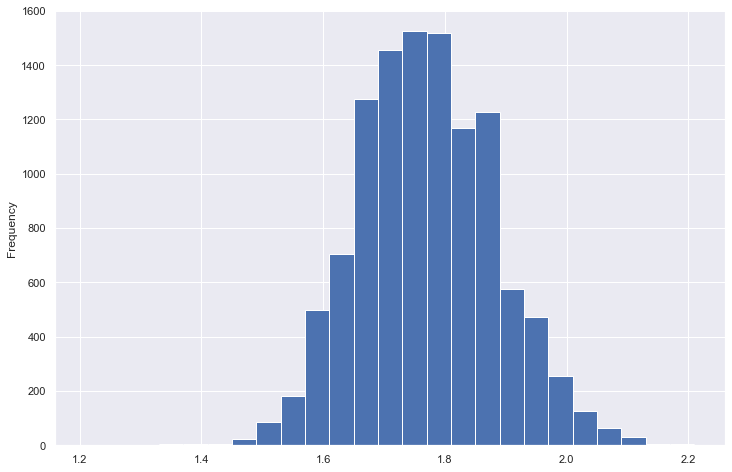

In [151]:
# Histograma
athletes['height'].plot(kind='hist', bins=25)

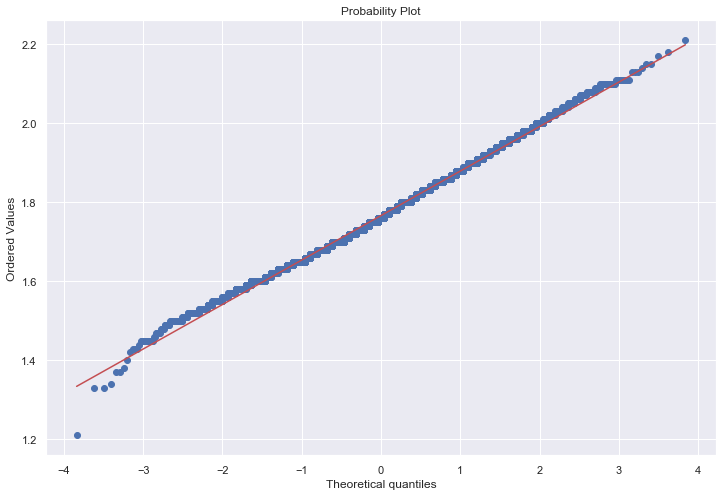

In [152]:
sct.probplot(athletes['height'].dropna(how='any',axis=0),plot=plt)
plt.show()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [153]:
def q2():
    # significância dada
    significance = 0.05  
    #amostra
    height = get_sample(athletes, 'height', n=3000)       
    # jb_value: float:The test statistic.
    # p_value:float:The p-value for the hypothesis test.
    jb_value, p_value = sct.jarque_bera(height)   
    return bool(p_value > significance)

In [154]:
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [155]:
def q3():
    # significância dada
    significance = 0.05
    #amostra
    weight = get_sample(athletes, 'weight', n=3000)  
    
    # statistic: float:The test statistic.
    # p_value:float:The p-value for the hypothesis test.     
    statistic, p_value = sct.normaltest(weight)  
    
    return bool(p_value > significance)

In [156]:
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

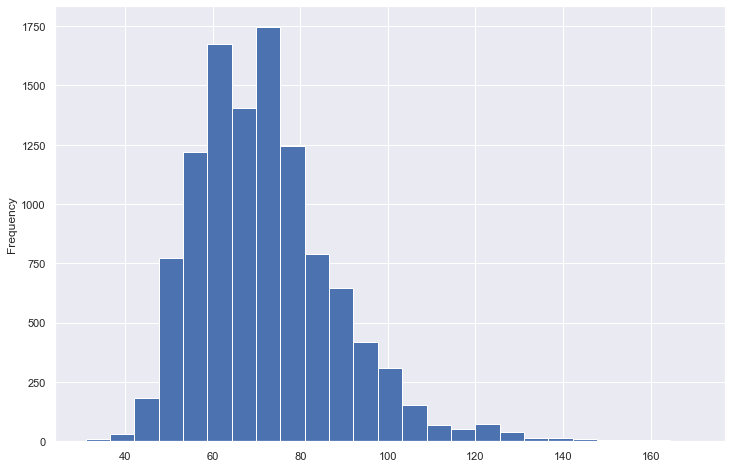

In [157]:
# Histograma
athletes['weight'].plot(kind='hist', bins=25)

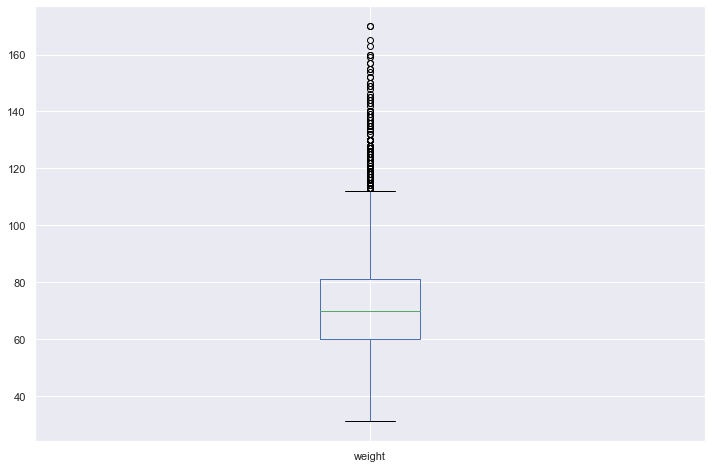

In [147]:
athletes.boxplot(column=['weight'])

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [158]:
def q4():
     # significância dada
    significance = 0.05
     #amostra  
    weight = get_sample(athletes, 'weight', n=3000)    
    weight_log = np.log(weight)
    # statistic: float:The test statistic.
    # p_value:float:The p-value for the hypothesis test.     
    statistic, p_value = sct.normaltest(weight_log) 
    return bool(p_value > significance)

In [159]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

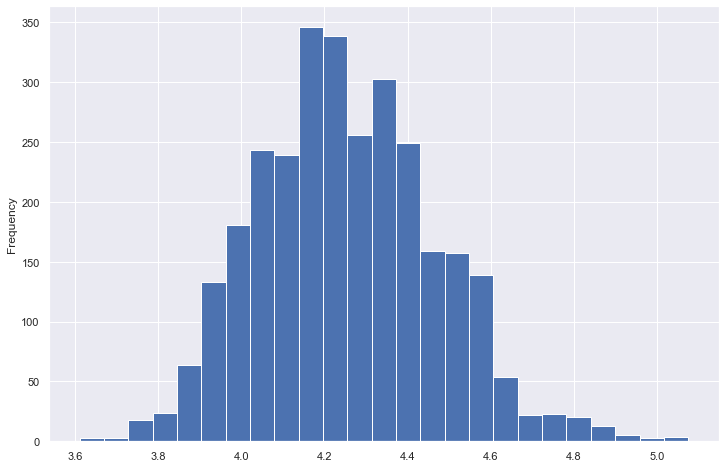

In [160]:
# Histograma
weight = get_sample(athletes, 'weight', n=3000)    
weight_log = np.log(weight)
weight_log.plot(kind='hist', bins=25)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [161]:
df = athletes.query('nationality =="BRA" | nationality =="USA" | nationality =="CAN"')

In [162]:
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,weight_new,weight_log
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,4.369448,4.369448
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1,4.584967,4.584967
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0,3.891820,3.891820
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0,4.219508,4.219508
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0,4.110874,4.110874


In [163]:
bra_sample = np.array(get_sample(df.query('nationality =="BRA"'), 'height'))
can_sample = np.array(get_sample(df.query('nationality =="CAN"'), 'height'))
usa_sample = np.array(get_sample(df.query('nationality =="USA"'), 'height'))

In [164]:
def q5():    
    #significância dada
    significance = 0.05      
    #statistic: float or array The calculated t-statistic
    #p_value: float or array The two-tailed p-value
    statistic, p_value = sct.ttest_ind(bra_sample, usa_sample, equal_var=False)    
    return bool(p_value > significance)

In [165]:
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [166]:
def q6():
    #significância dada
    significance = 0.05      
    #statistic: float or array The calculated t-statistic
    #p_value: float or array The two-tailed p-value
    statistic, p_value = sct.ttest_ind(bra_sample, can_sample, equal_var=False)    
    return bool(p_value > significance)

In [167]:
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [168]:
def q7():
     #significância dada
    significance = 0.05      
    #statistic: float or array The calculated t-statistic
    #p_value: float or array The two-tailed p-value
    statistic, p_value = sct.ttest_ind(df.query('nationality =="USA"').height, df.query('nationality =="CAN"').height, equal_var=False, nan_policy='omit')
    return float(round(p_value, 8))

In [169]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?